# Self-Organizing Maps (SOM)

This notebook demonstrates how to use Self-Organizing Maps (SOM) to cluster 2D data distribution.

## Import Required Libraries

Import the necessary libraries including matplotlib, pandas, and sklearn-som.

In [1]:
# Import the required libraries.
from typing import Tuple

import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn_som.som import SOM

## Define Helper Function for SOM Grid Plotting

Create a function to plot the connections in a Self-Organizing Map grid.

In [2]:
def plot_som_grid(
        som: SOM, grid_shape: Tuple, colors: list, line_color_idx: int=-1,
        line_style: str="-", line_width: float=0.75
    ):
    """
    Plot the connections in a Self-Organizing Map (SOM) grid.

    Args:
        som (SOM): The Self-Organizing Map (SOM) object.
        grid_shape (Tuple): The shape of the grid.
        colors (list): The list of colors to be used.
        line_color_idx (int): The index of the color to be used for the lines.
        line_style (str): The style of the lines.
        line_width (float): The width
    """
    n_rows, n_cols = grid_shape
    line_color = colors[line_color_idx]

    # Plot connections between SOM nodes.
    for i in range(n_rows):
        for j in range(n_cols):

            # Connect vertically if not in the last row.
            if i < n_rows - 1:
                plt.plot(
                    [ som.weights[i * n_cols + j, 0],
                      som.weights[(i + 1) * n_cols + j, 0] ],
                    [ som.weights[i * n_cols + j, 1],
                      som.weights[(i + 1) * n_cols + j, 1] ],
                    color=line_color, linestyle=line_style, linewidth=line_width
                )

            # Connect horizontally if not in the last column.
            if j < n_cols - 1:
                plt.plot(
                    [ som.weights[i * n_cols + j, 0],
                      som.weights[i * n_cols + (j + 1), 0] ],
                    [ som.weights[i * n_cols + j, 1],
                      som.weights[i * n_cols + (j + 1), 1] ],
                    color=line_color, linestyle=line_style, linewidth=line_width
                )

## Define Colors and Generate Sample Data

Define custom colors and generate blob data with multiple centers.

In [3]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]

# Anisotropicly distributed data.
N_SAMPLES = 1000
CENTERS = 9
RANDOM_STATE = 42
X, _ = datasets.make_blobs(
    n_samples=N_SAMPLES, centers=CENTERS, random_state=RANDOM_STATE)

# Creating a DataFrame for the dataset.
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

## Initialize and Fit Self-Organizing Map

Create and train the SOM with a 2x3 grid structure.

In [4]:
# Initialize and fit the Self-Organizing Map (SOM).
som = SOM(m=2, n=3, dim=2, random_state=RANDOM_STATE)
som.fit(X)

# Predict the cluster for each data point.
predictions = som.predict(X)

# Add the predictions to the DataFrame.
df["SOM_Cluster"] = predictions

## Visualize SOM Clustering Results

Plot the clustered data with SOM grid connections and node positions.

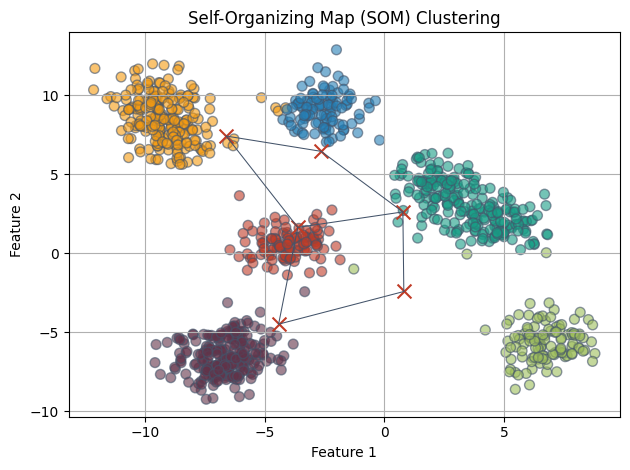

In [5]:
# Plot the clustered data.
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=[colors[color] for color in df["SOM_Cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)
plt.scatter(
    som.weights[:, 0], som.weights[:, 1],
    color=colors[4], marker="x", s=100
)
plot_som_grid(som, (2, 3), colors)

plt.title("Self-Organizing Map (SOM) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()